In [1]:
import pandas as pd

In [2]:
%matplotlib inline

## When to use a "groupby" in pandas?

- Anytime when we need to analyze some pandas series by some category we need to use the **groupby()**.
- It is like a `foreach` loop.

In [3]:
# read a dataset of alcohol consumption into a DataFrame

drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
# calculate the mean beer servings across the entire dataset

drinks.beer_servings.mean()

106.16062176165804

In [5]:
# calculate the mean beer servings just for countries in Africa

drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [6]:
# calculate the mean beer servings for each continent

drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [7]:
# other aggregation functions (such as 'max') can also be used with groupby

drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [8]:
# multiple aggregation functions can be applied simultaneously
# .agg() allows us multiple aggregation functions in one go

drinks.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


In [9]:
# specifying a column to which the aggregation function should be applied is not required

drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


<AxesSubplot:xlabel='continent'>

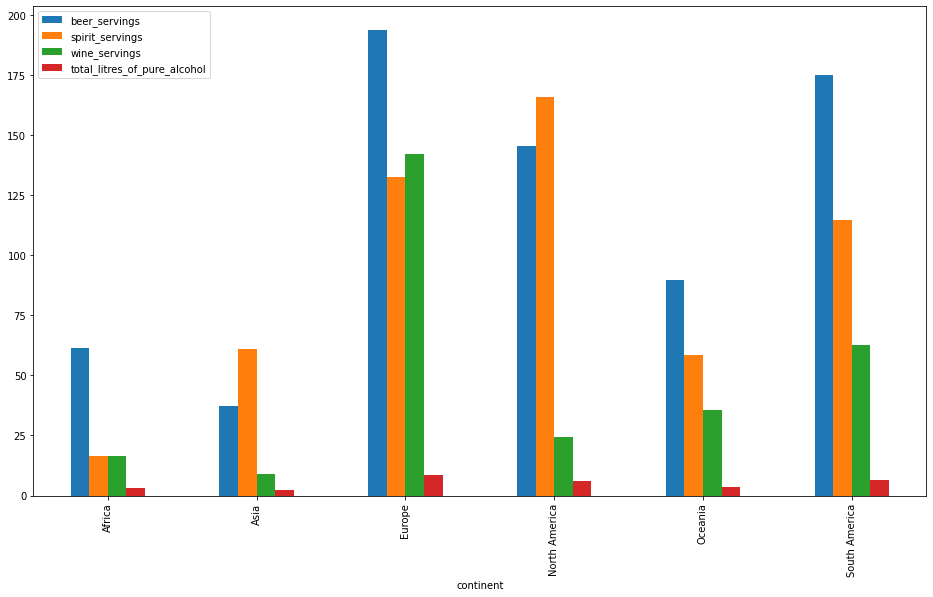

In [17]:
# side-by-side bar plot of the DataFrame directly above

drinks.groupby('continent').mean().plot(kind='bar', figsize=(16, 9))

<AxesSubplot:ylabel='continent'>

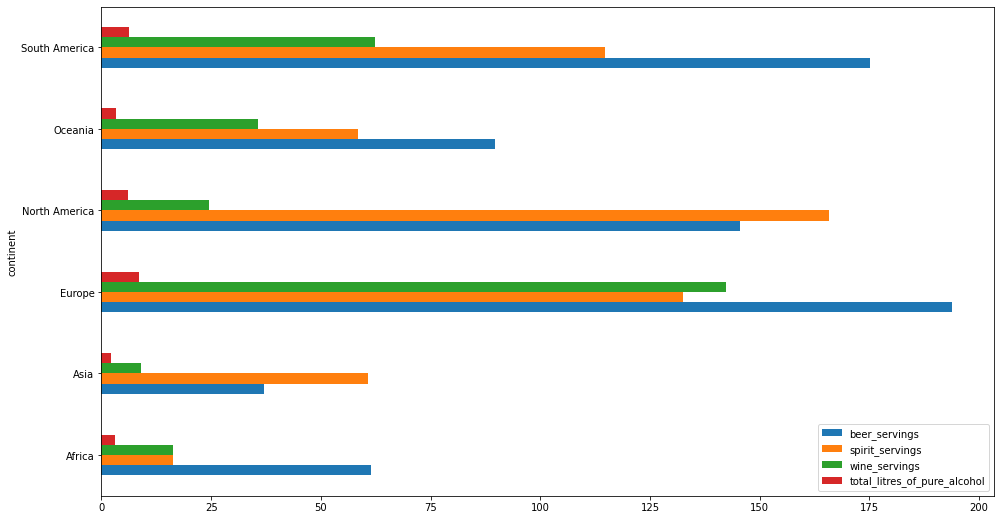

In [16]:
# Creating the horizontal bar chart

drinks.groupby('continent').mean().plot(kind='barh', figsize=(16, 9))